<a href="https://colab.research.google.com/github/AasthaKaur/EV-Market-Segmentation/blob/main/EV_EDA_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import of Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

**Import of the CSV file**

In [ ]:
df= pd.read_csv('/content/ElectricCarData_Clean.csv')

In [ ]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


**Finding out the null values**

In [ ]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

There exists no null value.

**Descriptive Statistics of the dataset**

In [ ]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


**Information of the type of the data in search column**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [ ]:
a= np.arange(1,104)

**Pairplot of all the columns based on Rapid Charger presence**

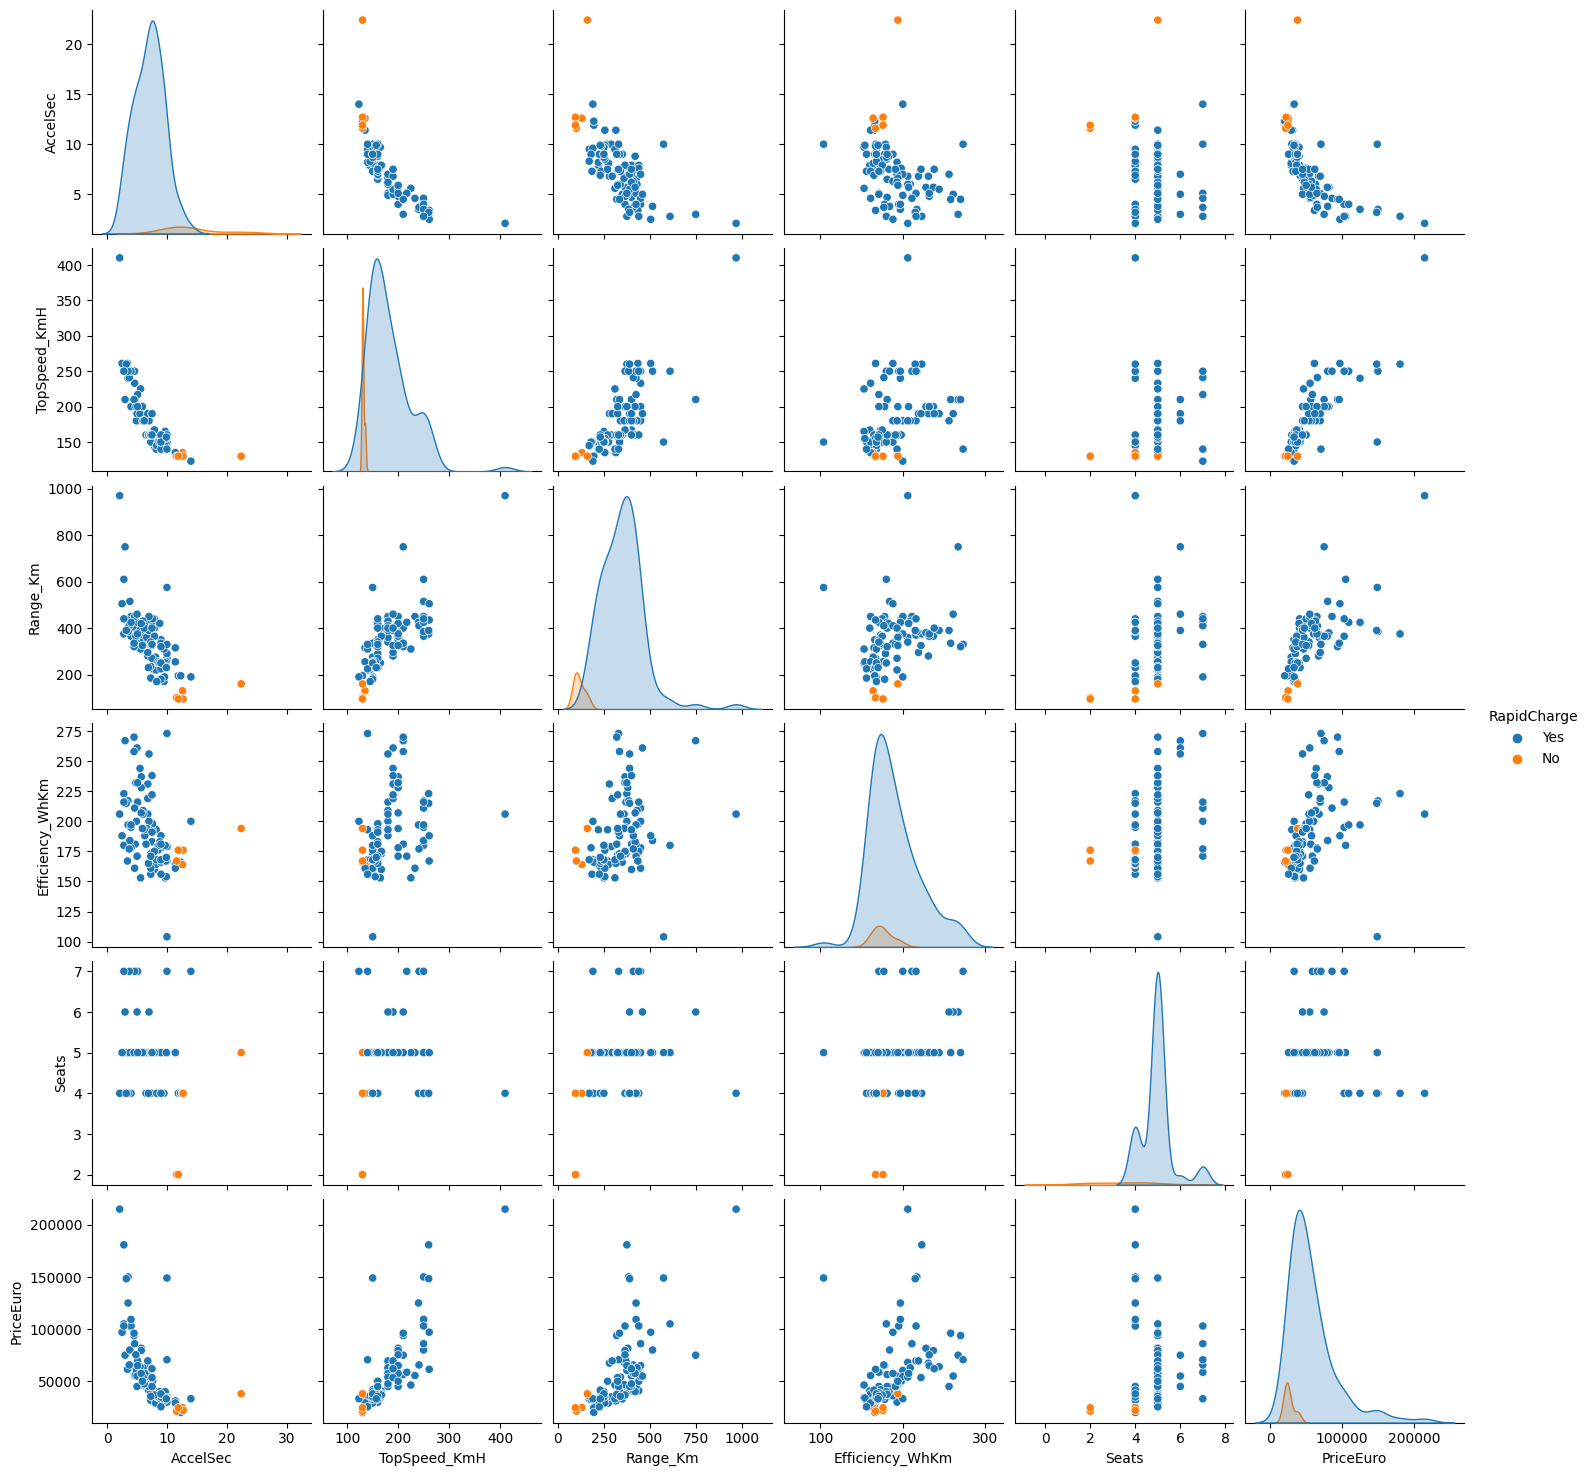

In [ ]:
sb.pairplot(df,hue='RapidCharge')

**Heatmap to show the correlation of the data**

<ipython-input-10-ac0745e1c6f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)


<Axes: >

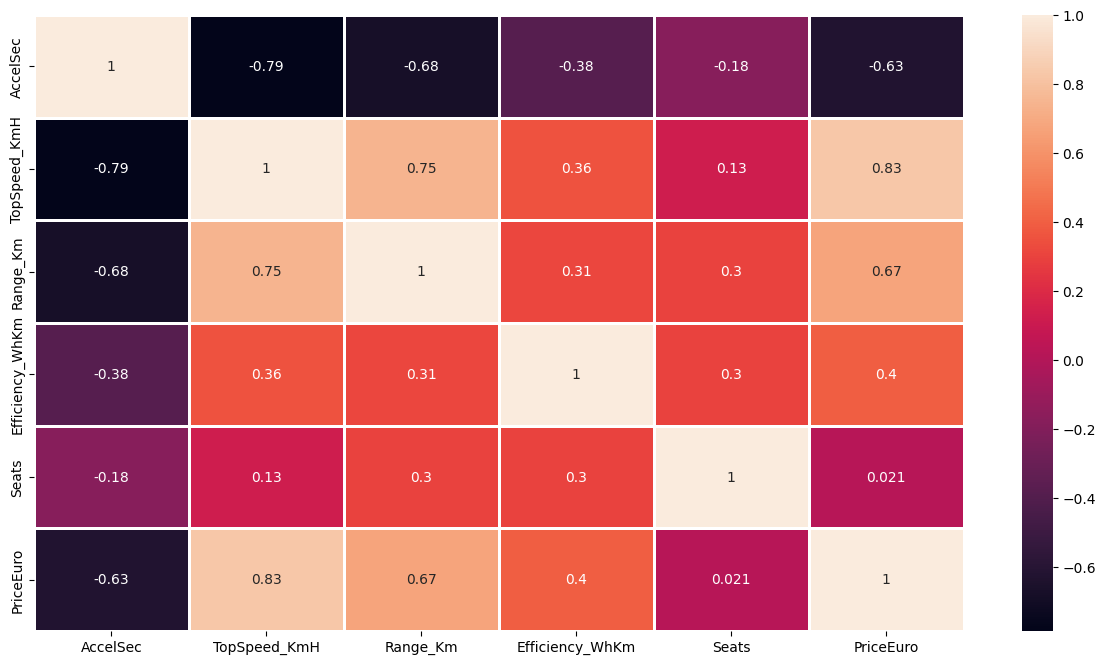

In [ ]:
ax= plt.figure(figsize=(15,8))
sb.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

**Frequency of the Brands in the dataset**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

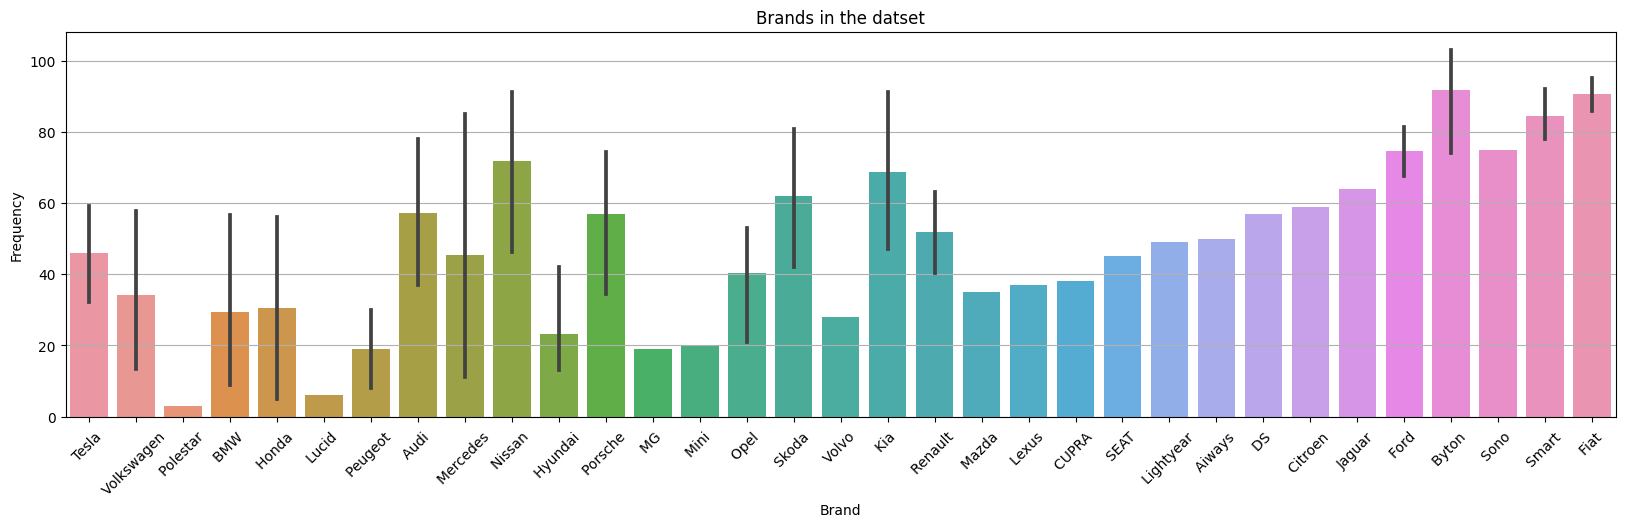

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Byton, Flat and smart are the prominent brands and Polestar being the least

**Top speeds achieved by the cars of a brand**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

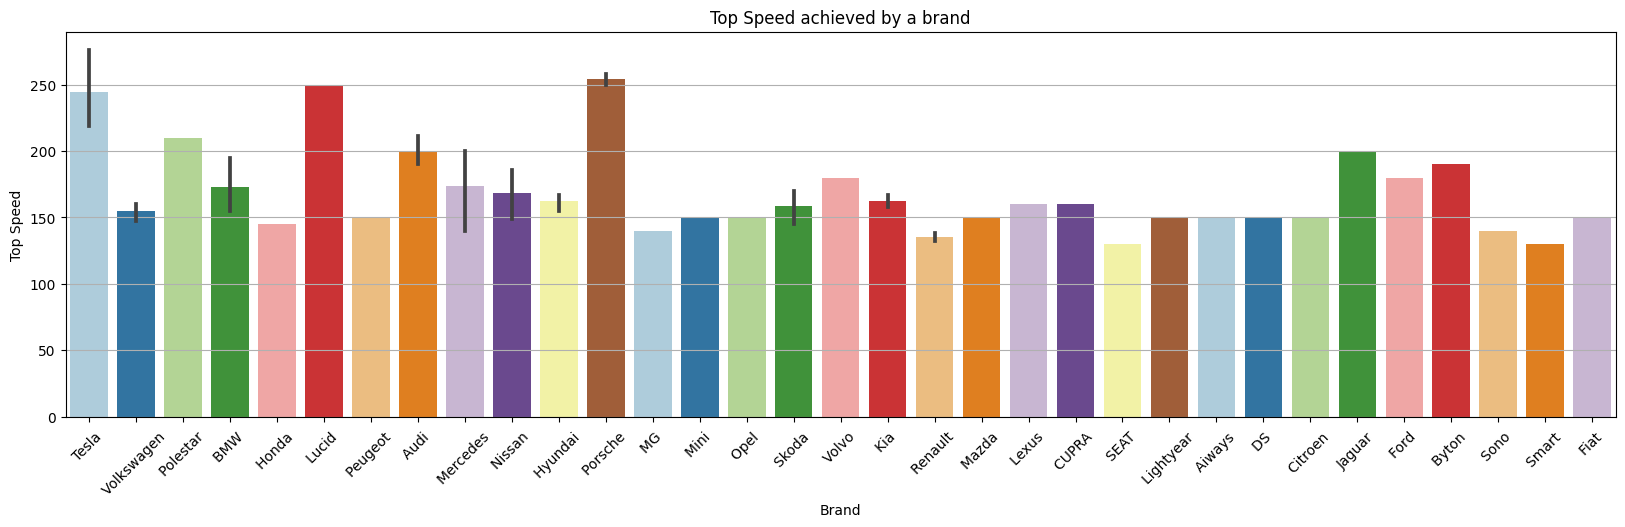

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

Porsche, Lucid and Tesla produce the fastest cars and Smart the lowest

**Range a car can achieve**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

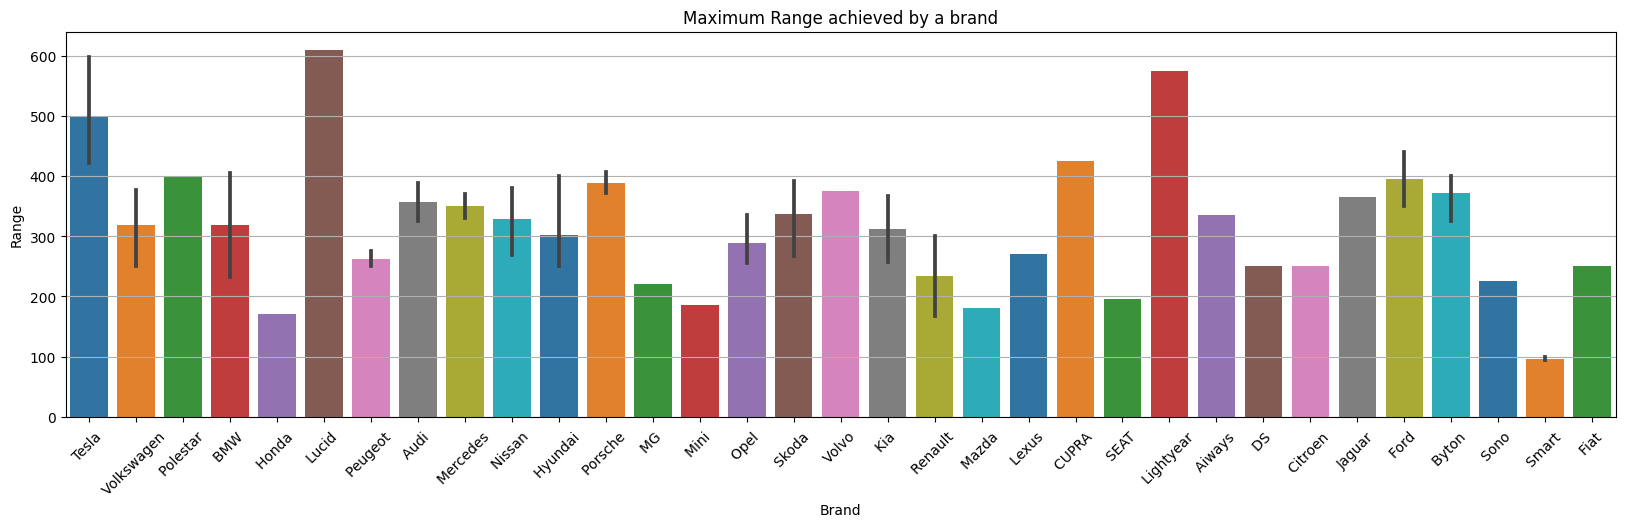

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Range_Km',data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

Lucid, Lightyear and Tesla have the highest range and Smart the lowest

**Car Efficiency**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

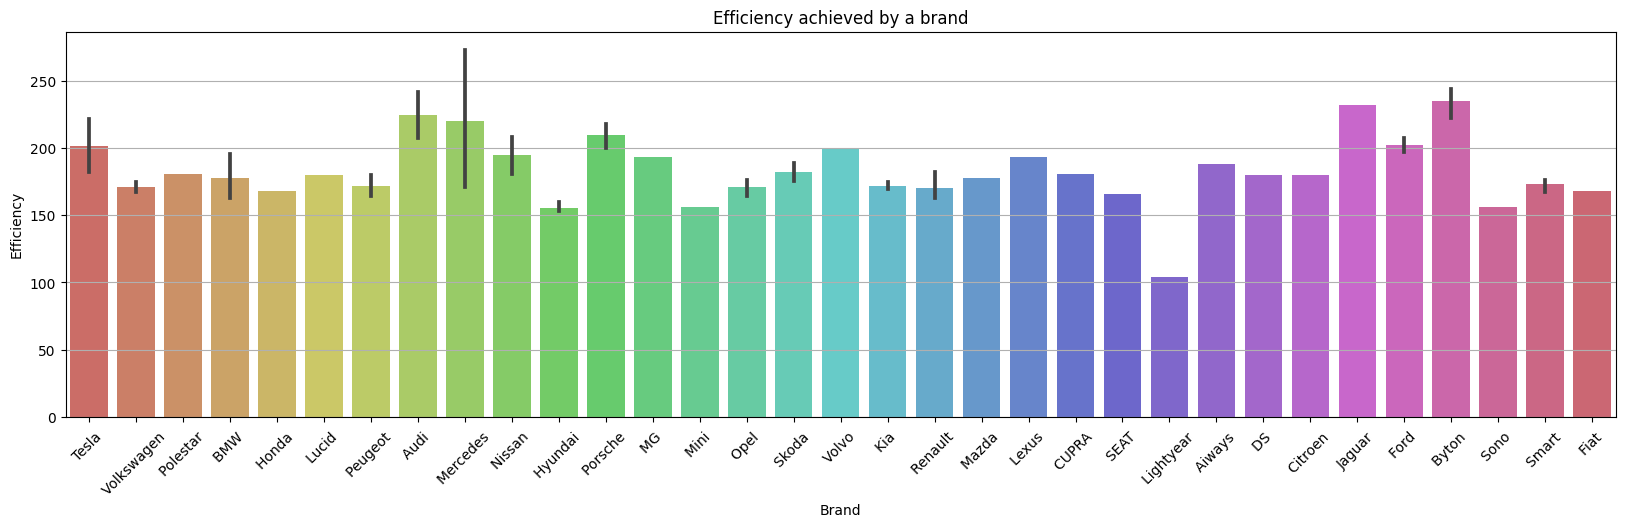

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

Byton, Jaguar and Audi are the most efficient and LightYear the least

**Number of seats in each car**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

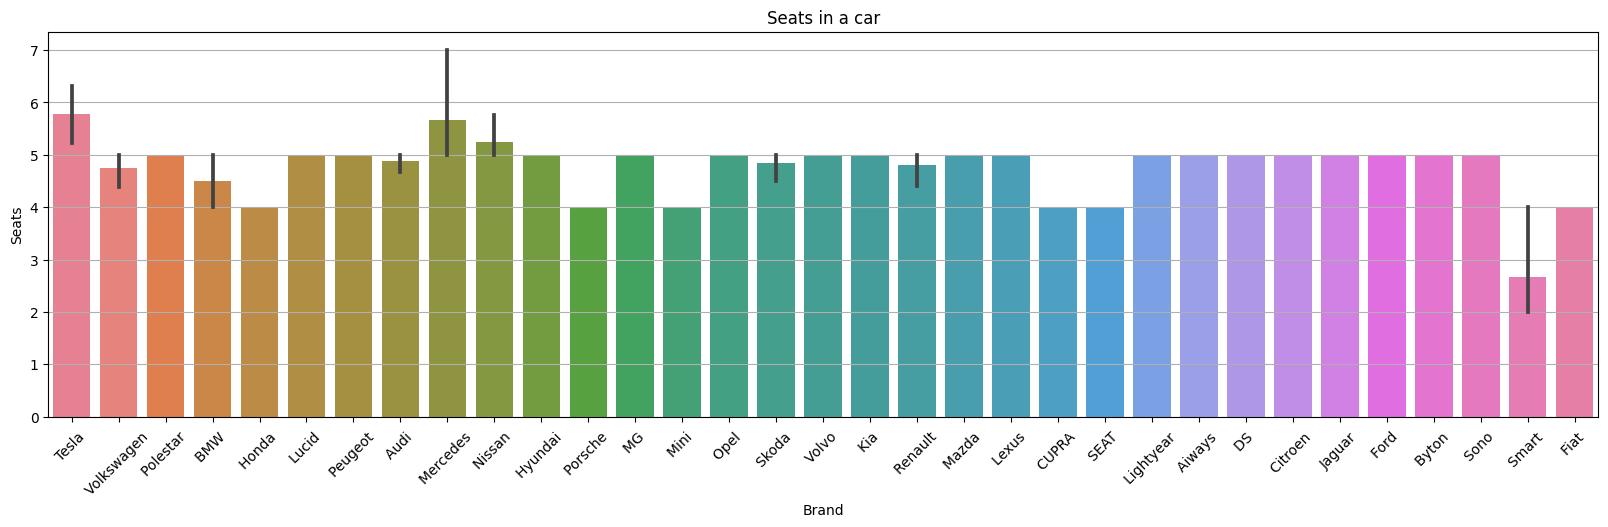

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

Mercedes, Tesla and Nissan have the highest number of seats and Smart the lowest

**Price of Cars (in Euro)**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

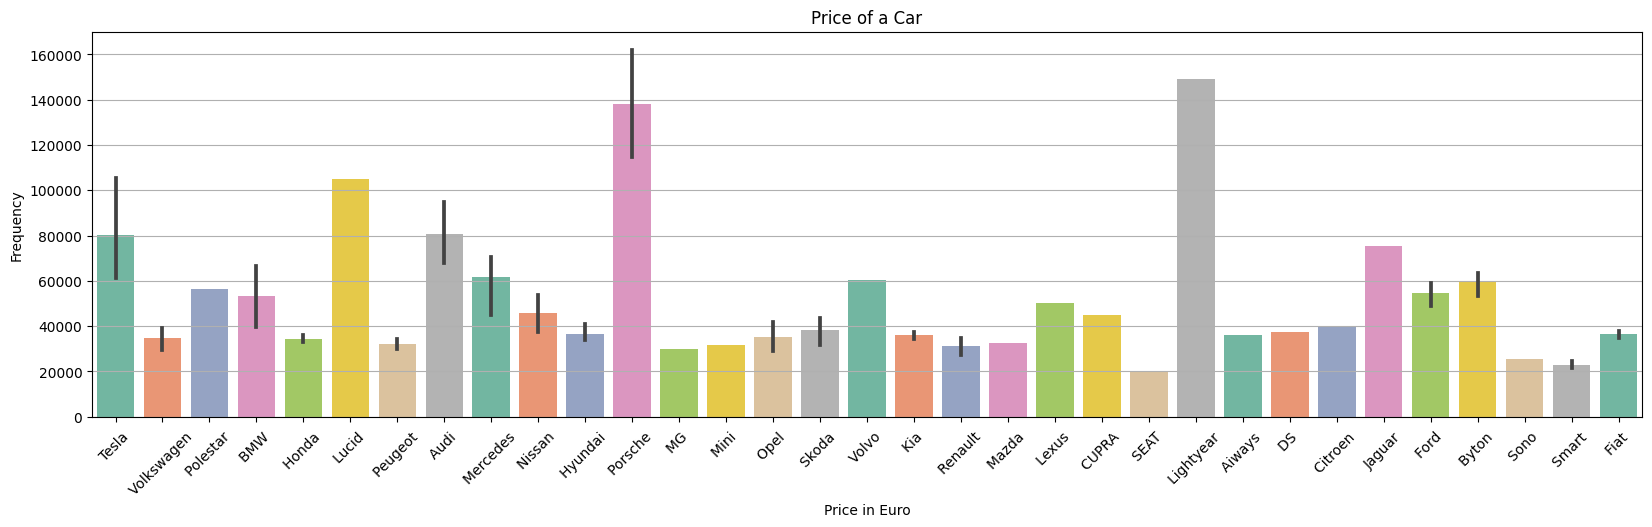

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='PriceEuro',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in Euro')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Lightyear, Porsche and Lucid are the most expensive and SEAT and Smart the least

**Type of Plug used for charging**

Text(0.5, 1.0, 'Plug Type')

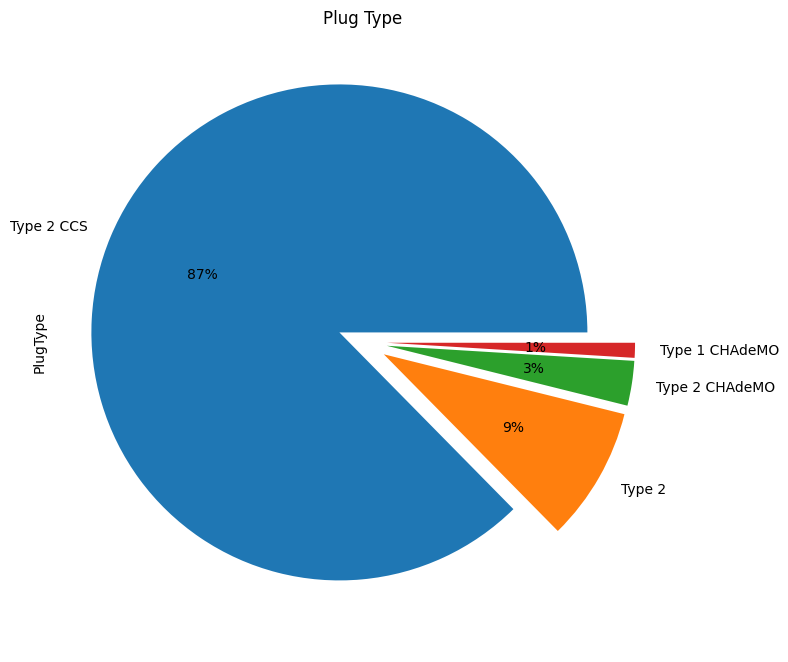

In [ ]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Most companies use Type 2 CCs and Type 1 CHAdeMo the least

**Cars and their body style**

Text(0.5, 1.0, 'Body Style')

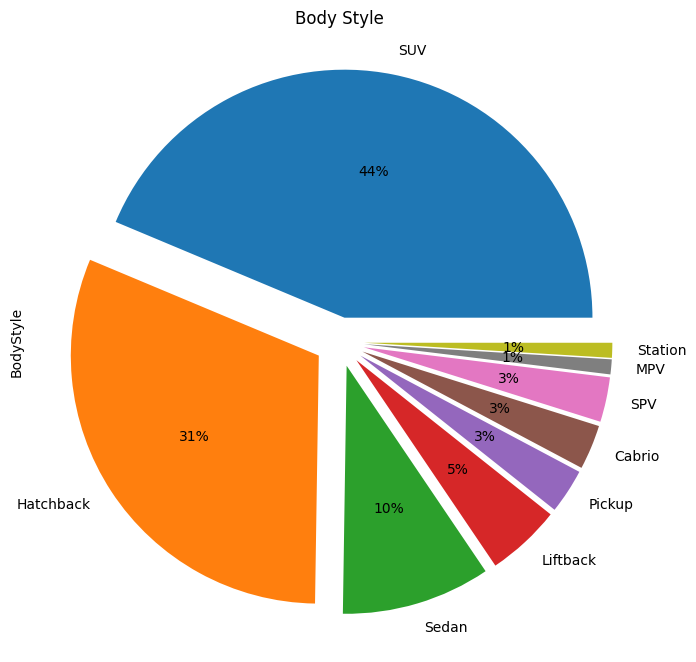

In [ ]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Most cars are either SUV or Hatchback

**Putting independent variables as x and dependent variable as y**

In [ ]:
x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm']]
y=df['PriceEuro']

**Finding out the linear regression using OLS method**

In [ ]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

**Fitting the model and summarizing**

In [ ]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     60.28
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           1.37e-25
Time:                        12:09:20   Log-Likelihood:                -1156.8
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      98   BIC:                             2337.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.051e+05    2.3e+04     -4.578      0.000   -1.51e+05   -5.96e+04
AccelSec         1482.2127   1033.219      1.435      0.155    -568.178    3532.603
Range_Km           37.7714     22.680      1.665      0.099      -7.236      82.779
TopSpeed_KmH      613.9243     78.224      7.848      0.000     458.691     769.157
Efficiency_WhKm   143.7166     68.228      2.106      0.038       8.320     279.113
==============================================================================
Omnibus:                       94.859   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1049.593
Skew:                           2.978   Prob(JB):                    1.21e-228
Kurtosis:                      17.460   Cond. No.                     5.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Only Top Speed and Efficiency are the two variables related to price

**Importing train test split from Scikit Learn**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

**Finding out the R squared value**

In [ ]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred))
print(r2*100)

78.35225979903608


Around 78% of the dependant variable has been explained by the independant variables

**Putting Yes value as 1 and No value as 0 for Logistic Regression**

In [ ]:
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
y1=df[['RapidCharge']]
x1=df[['PriceEuro']]
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [ ]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**Confusion Matrix of the regression**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, pred1)
cm

array([[ 0,  1],
       [ 0, 20]])

**Finding out the accuracy score**

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y1_test,pred1)
score*100

95.23809523809523

The data is accurate upto 95%